In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
sns.set_theme(style="darkgrid")
import warnings
warnings.simplefilter("ignore")

In [191]:
data=pd.read_excel(r'C:\Users\Raghav Jha\Downloads\EMPLOYEE ATTRITION DATA.xlsx')

In [192]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [10]:
data.shape

(1470, 35)

In [15]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [11]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [171]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
Gender,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.00,1.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0


No     1233
Yes     237
Name: Attrition, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


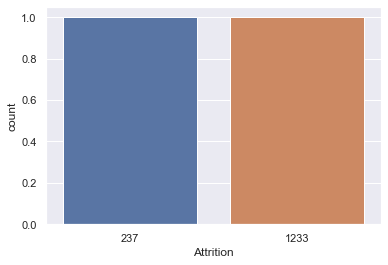

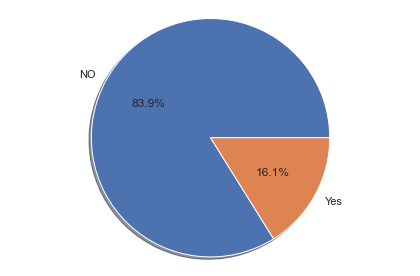

In [29]:
#Attrition in percentage
att=data['Attrition'].value_counts()
print(att,sns.countplot(att))
labels=['NO','Yes']
fig1,ax1=plt.subplots()
ax1.pie(att,labels=labels,autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.tight_layout()
plt.show()


# here we check is age effect the attrition

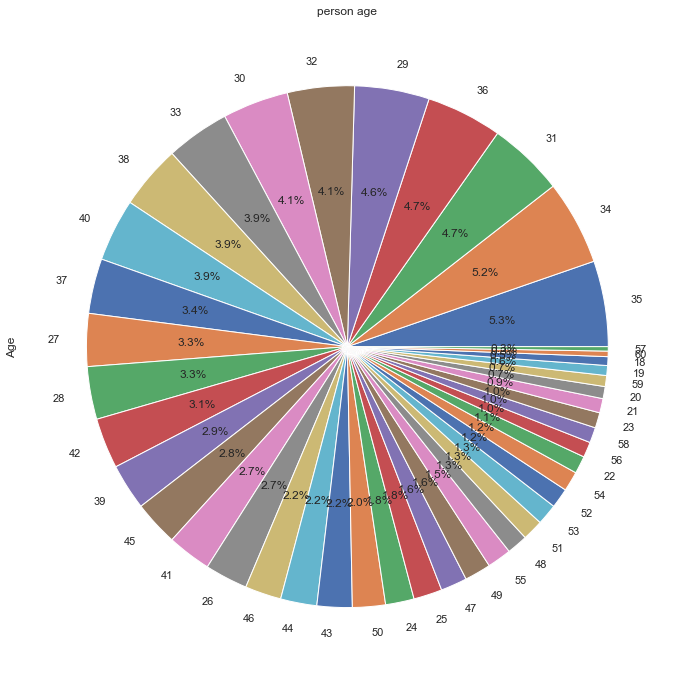

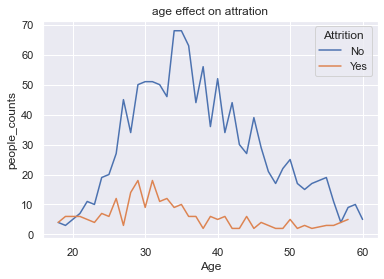

In [103]:
plt.figure(figsize=(12,12))
data['Age'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('person age')
plt.show()
age=data.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='people_counts')
sns.lineplot(data=age,x='Age',y='people_counts',hue='Attrition')
plt.title('age effect on attration')
plt.show()

Here we check travling effect on Attration

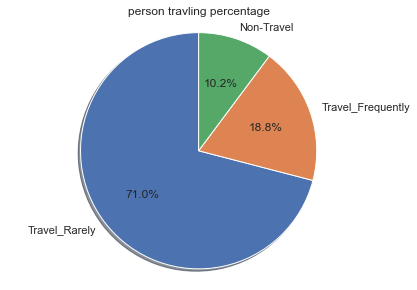

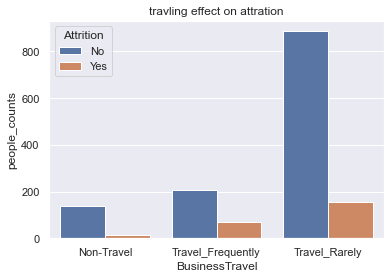

In [138]:
labels=['Travel_Rarely','Travel_Frequently','Non-Travel']
fig1, ax1 = plt.subplots()
ax1.pie(bt,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title('person travling percentage')
plt.show()
travel=data.groupby(['BusinessTravel','Attrition']).apply(lambda x:x['BusinessTravel'].count()).reset_index(name='people_counts')
sns.barplot(data=travel,x='BusinessTravel',y='people_counts',hue='Attrition')
plt.title('travling effect on attration')
plt.show()

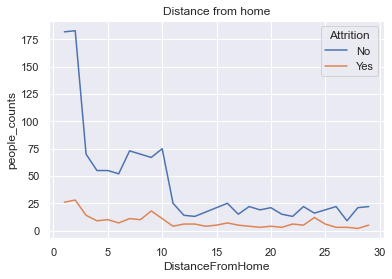

In [107]:
distance=data.groupby(['DistanceFromHome','Attrition']).apply(lambda x:x['DistanceFromHome'].count()).reset_index(name='people_counts')
sns.lineplot(data=distance,x='DistanceFromHome',y='people_counts',hue='Attrition')
plt.title('Distance from home')

#attration effect in monthely income

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Counts'>

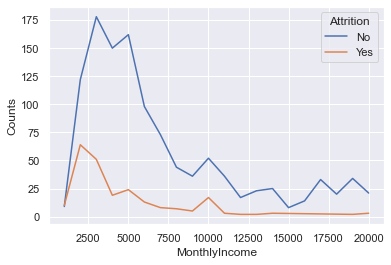

In [127]:
rate_att=data.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
sns.lineplot(data=rate_att,x='MonthlyIncome',y='Counts',hue='Attrition')

How work envorment effect on attration

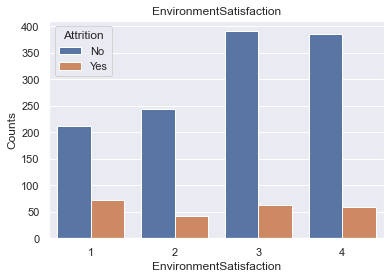

In [153]:
envo=data.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
sns.barplot(data=envo,x='EnvironmentSatisfaction',y='Counts',hue='Attrition')
plt.title('EnvironmentSatisfaction')
plt.show()

JobSatisfaction affect on attration

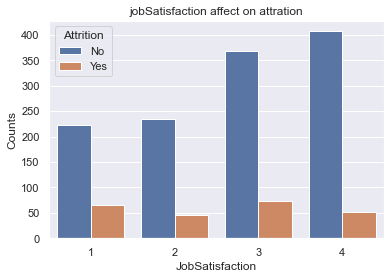

In [150]:
jobs=data.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
sns.barplot(data=jobs,x='JobSatisfaction',y='Counts',hue='Attrition')
plt.title('jobSatisfaction affect on attration')
plt.show()

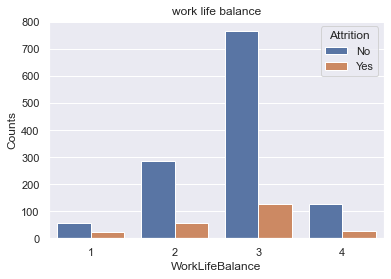

In [158]:
work=data.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['Attrition'].count()).reset_index(name='Counts')
sns.barplot(data=work,x='WorkLifeBalance',y='Counts',hue='Attrition')
plt.title('work life balance')
plt.show()

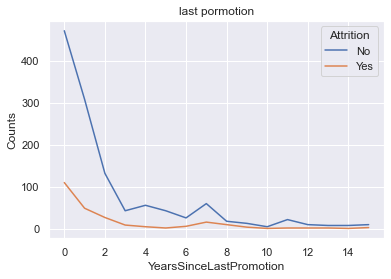

In [160]:
pormotion=data.groupby(['YearsSinceLastPromotion','Attrition']).apply(lambda x:x['Attrition'].count()).reset_index(name='Counts')
sns.lineplot(data=pormotion,x='YearsSinceLastPromotion',y='Counts',hue='Attrition')
plt.title('last pormotion')
plt.show()

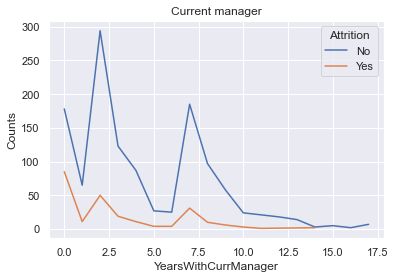

In [161]:
current=data.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['Attrition'].count()).reset_index(name='Counts')
sns.lineplot(data=current,x='YearsWithCurrManager',y='Counts',hue='Attrition')
plt.title('Current manager')
plt.show()

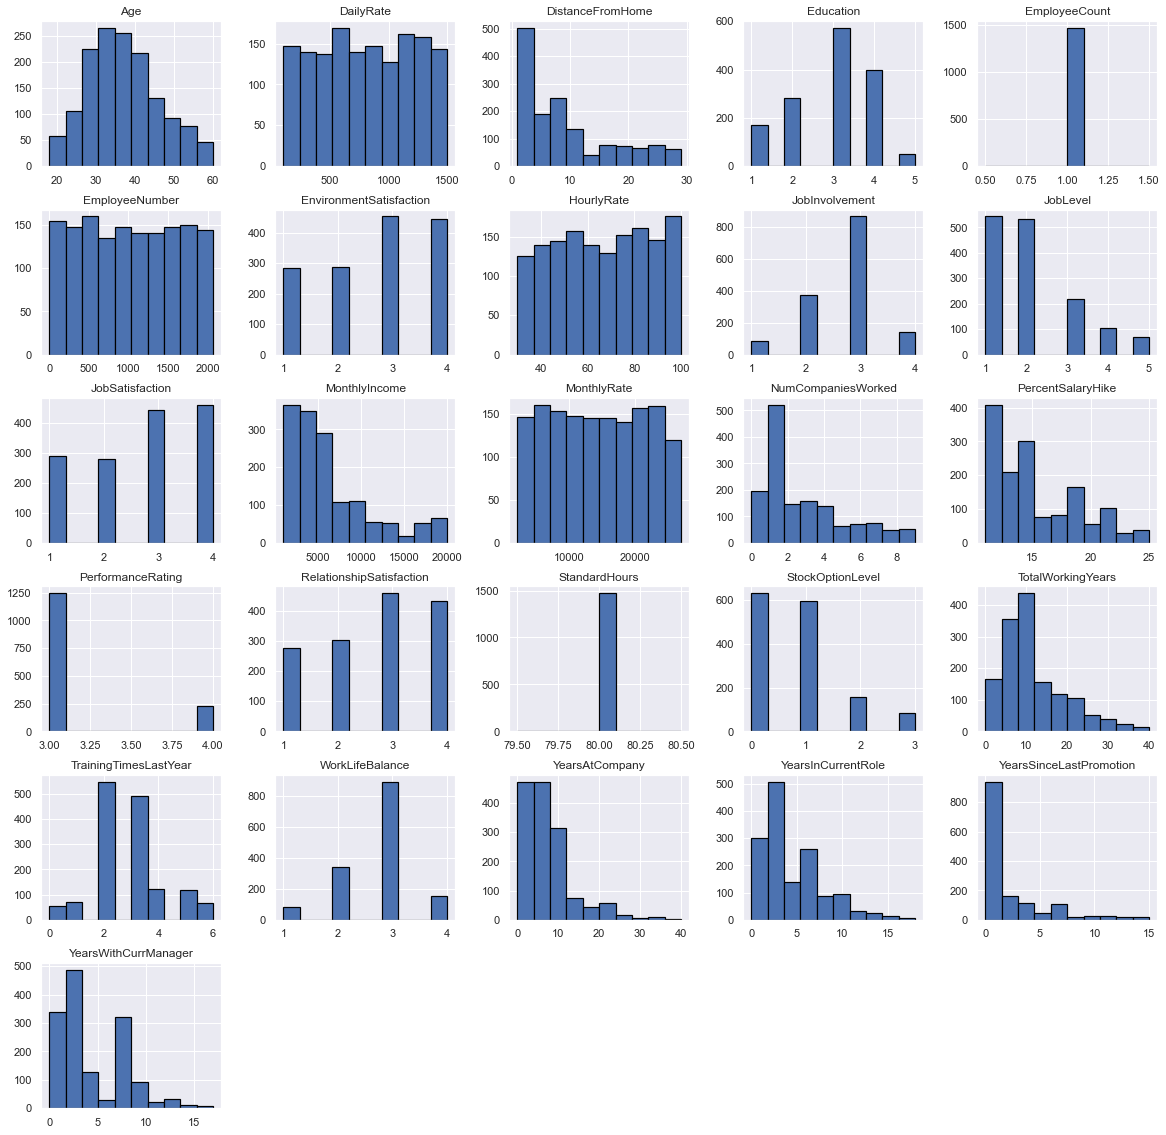

In [146]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

In [195]:
#clean data for best prediction
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','Gender','BusinessTravel','Department','EducationField','JobRole'], axis="columns", inplace=True)

In [236]:
#convert data into categorical
data['Attrition'] = data.Attrition.astype("category").cat.codes

<AxesSubplot:>

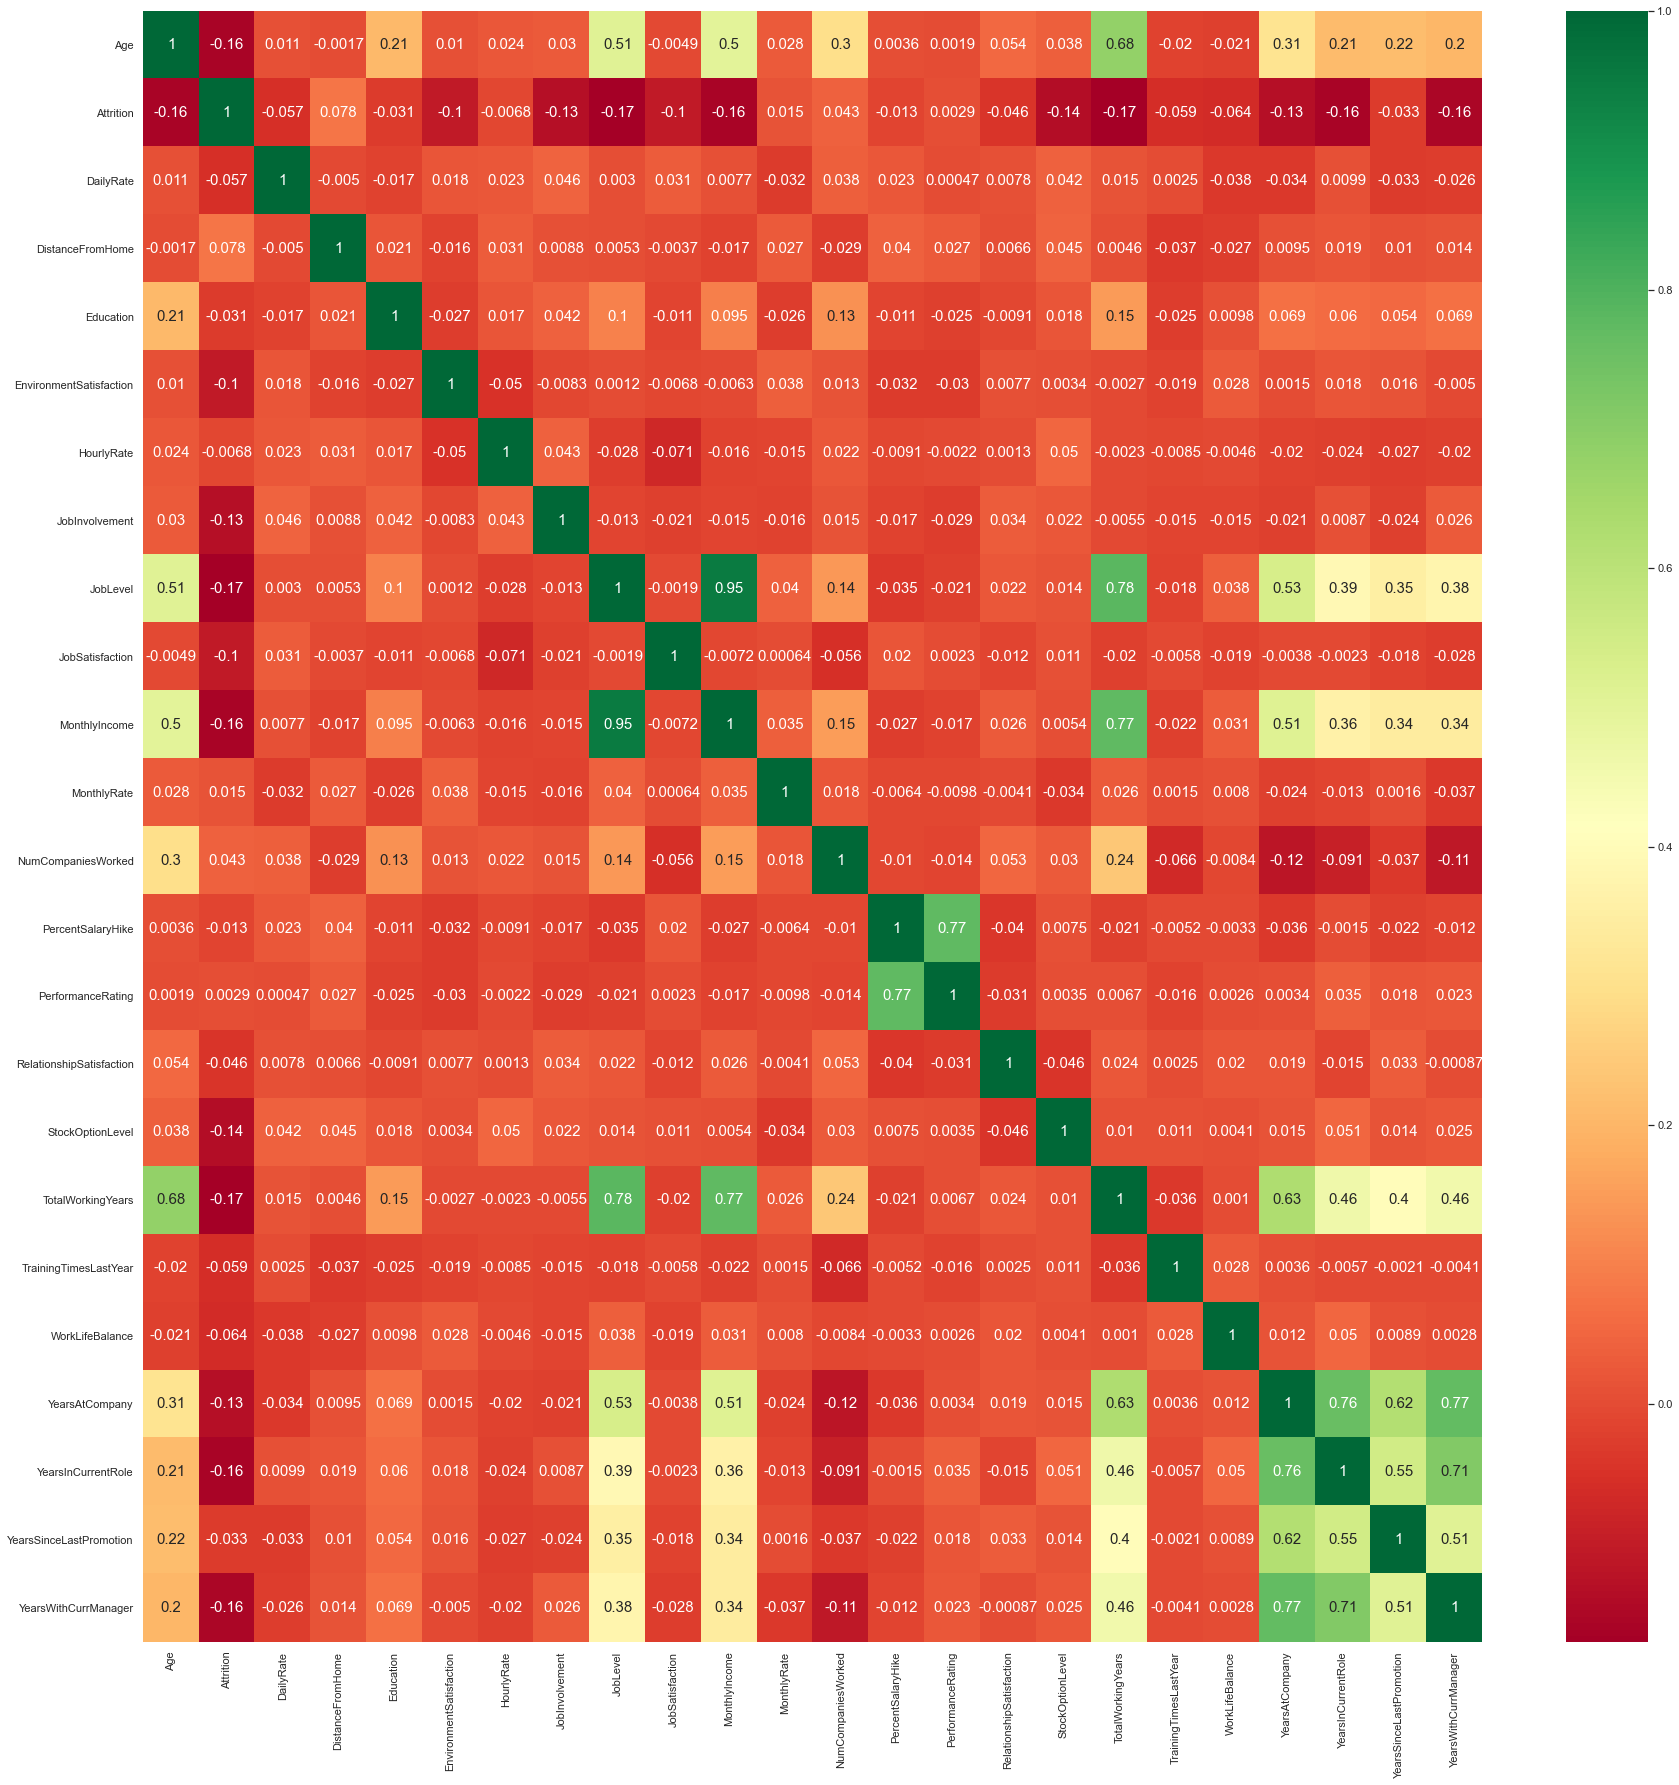

In [237]:
#coorelation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [238]:
data.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [239]:
X=data[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=data[['Attrition']]

In [240]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=.25)

In [241]:
lgt =LogisticRegression()
fit=lgt.fit(X_train,y_train)

In [242]:
trainscore=lgt.score(X_train,y_train)
trainscore

0.837568058076225

In [243]:
lgtpredict=lgt.predict(X_test)

Text(0.5, 12.5, 'predicted label')

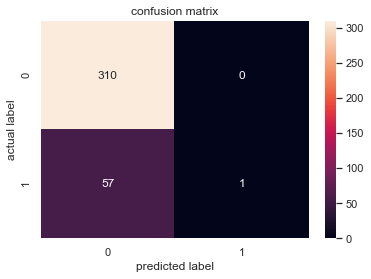

In [244]:
from sklearn import metrics
cf=metrics.confusion_matrix(y_test,lgtpredict)
sns.heatmap(pd.DataFrame(cf),annot=True,fmt='g')
plt.title('confusion matrix')
plt.ylabel('actual label')
plt.xlabel('predicted label')

In [245]:
print(metrics.accuracy_score(y_test,lgtpredict))

0.845108695652174


In [246]:
print(metrics.classification_report(y_test,lgtpredict))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       310
           1       1.00      0.02      0.03        58

    accuracy                           0.85       368
   macro avg       0.92      0.51      0.47       368
weighted avg       0.87      0.85      0.78       368



In [247]:
metrics.roc_auc_score(y_test,lgtpredict,average='weighted')

0.5086206896551724

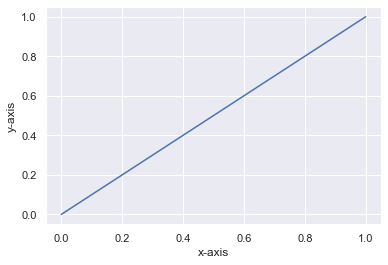

In [250]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,lgtpredict,pos_label=2)
plt.plot([0,1],[0,1],'-')
plt.plot(fpr,tpr,label='logistic curve')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()